In [1]:
import pandas as pd #dataframe manipulation
import numpy as np #linear algebra

#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer #cluster visualizer

#sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

In [2]:
#pyclustering kmenas
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [3]:
data = pd.read_csv ("C:/Users/Admin/Downloads/archive (2)/Mall_Customers.csv")
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = data.iloc[:, 2:5].values #feature matrix
y = data.iloc[:, -1].values #class matrix

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


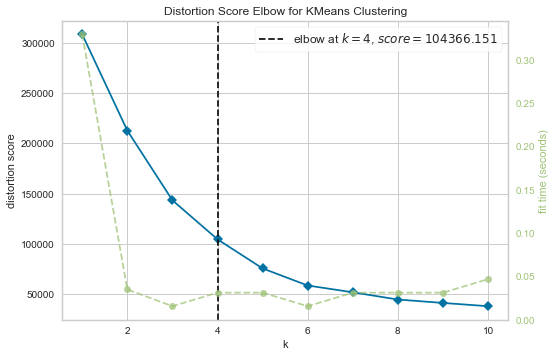

In [5]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(x) #fit the data into the visualizer
visualizer.show() #finalize and render the figure
plt.show()

In [6]:
# instatiate KMeans class and set the number of clusters
km_model = KMeans(n_clusters=4, random_state=10)

#call fit method with data
km = km_model.fit_predict(x)

#coordinates of cluster center
centroids = km_model.cluster_centers_

#cluster label for each data point
labels = km_model.labels_

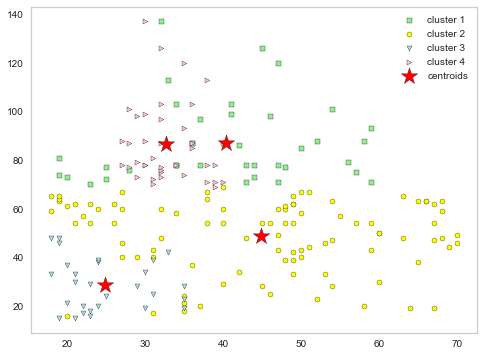

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(
    x[km == 0, 0], x[km == 0, 1],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x[km == 1, 0], x[km == 1, 1],
    s=25, c='yellow',
    marker='o' , edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x[km == 2, 0], x[km == 2, 1],
    s=25, c='lightblue',
    marker='v' , edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    x[km == 3, 0], x[km == 3, 1],
    s=25, c='pink',
    marker= '>' , edgecolor='black',
    label='cluster 4'
)

# visualise centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [12]:
def purity_score(y_true, y_pred):
    #compute contingency matrix(also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    #return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

#report purity score
purity  = purity_score(y, labels)
print(f"The purity score is{round(purity*100, 2)}%")

The purity score is9.5%


In [16]:
#define dictionary for distance for distance measures
distance_measures = {'manhattan': 2}

#function to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(x, 4, random_state=5).initialize()
    #instance created for respective distance metric
    instanceKm = kmeans(x, initial_centers=initial_centers, 
                        metric=distance_metric(dist_measure))
    #perform cluster analysis
    instanceKm.process()
    #cluster analysis result - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    #enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, x)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    #function purity score is defined in previous section
    return purity_score(y, pyLabels)

#print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100,2)}%")

The purity score for manhattan distance is 9.0%
